<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Version_2023_summer/SeohyunKim/(after)%202_solving_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part II. Solving equations

# 1 - Solving a quadratic equation with discriminant

In [4]:
import cmath # Complex math module

def solve_quadratic(a, b, c):
    # Here you define the discriminant, D
    D = cmath.sqrt(b**2 - 4*a*c)

    # calculate two solutions
    sol1 = (-b - D) / (2 * a)
    sol2 = (-b + D) / (2 * a)

    return sol1, sol2

# Test the function
# Feed your numbers a,b,c
a = 1
b = -2
c = -3

sol1, sol2 = solve_quadratic(a, b, c)

print(f"The solutions are {sol1} and {sol2}")


The solutions are (-1+0j) and (3+0j)


# 2 - Checking if there is a real solution: Use if statement

In [5]:
import cmath

def solve_quadratic(a, b, c):
    # Calculate the discriminant
    D = b**2 - 4*a*c

    # Determine the number and type of solutions based on the discriminant
    # Return number of real solutions, and two solutions
    sol1 = (-b - cmath.sqrt(D)) / (2 * a)
    sol2 = (-b + cmath.sqrt(D)) / (2 * a)

    if D<0:
      num_solutions = 0
    elif D==0:
      num_solutions = 1
    else:
      num_solutions = 2

    return num_solutions, sol1, sol2


# Test the function
a = 1
b = -2
c = 1

#
num_solutions, sol1, sol2 = solve_quadratic(a, b, c)

print(f"There are {num_solutions} real solution(s).")
if num_solutions == 2:
    print(f"The solutions are {sol1} and {sol2}.")
elif num_solutions == 1:
    print(f"The solution is {sol1}.")
else:
    print(f"There are no real solutions, but two complex solutions: {sol1} and {sol2}.")


There are 1 real solution(s).
The solution is (1+0j).


# Now move on to Numerical solver
# 3 - Newton's method


Found solution after 11 iterations.
Root is at: 0.999755859375
f(root) = 5.960464477539063e-08


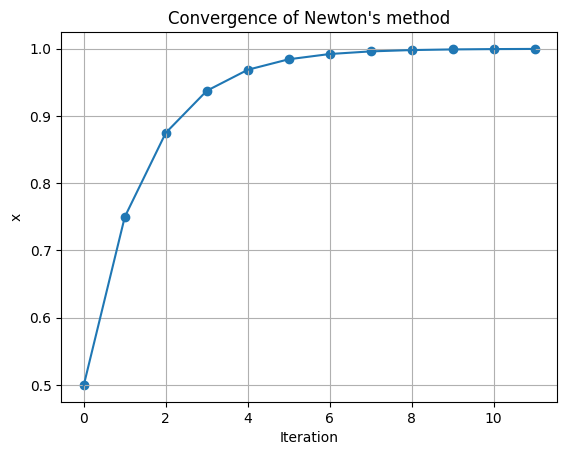

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return a*x**2 + b*x + c

def df(x):
    return 2*a*x + b

def newton_method(x0, f, df, epsilon=1e-7, max_iter=1000):
    """
    Function to apply Newton's method for solving equation f(x)=0.

    Parameters:
    x0 - initial guess
    f - function
    df - derivative of the function
    epsilon - stopping criteria is abs(f(x)) < epsilon
    max_iter - maximum number of iterations
    """

    xn = x0
    x_steps = [x0]
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn, x_steps
        dfxn = df(xn)
        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return None, None
        xn = xn - fxn/dfxn
        x_steps.append(xn)
    print('Exceeded maximum iterations. No solution found.')
    return None, None

# coefficients of the quadratic equation
a = 1
b = -2
c = 1

# Initial guess
x0 = 0.5

# Call the function
root, steps = newton_method(x0, f, df)

print('Root is at:', root)
print('f(root) =', f(root))
# Plot solution versus iteration
# Title: "Convergence of Newton's method"
# xlabel: Iteration
# ylabel: x
# Data plot with line and mark

fig, ax = plt.subplots()
x = np.arange(0,len(steps))

ax.plot(x, steps)
ax.scatter(x, steps)
ax.grid()

ax.set_xlabel('Iteration')
ax.set_ylabel('x')
ax.set_title("Convergence of Newton's method")
plt.show()

#4 - Secant Method

Found solution after 17 iterations.
Root is at: 0.9998001776199804
f(root) = 3.9928983563974896e-08


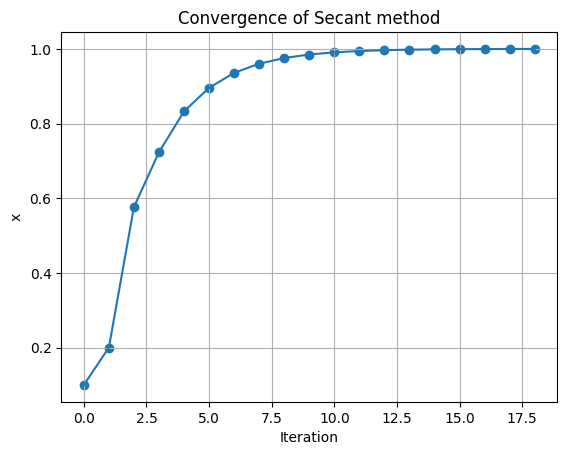

In [11]:
def f(x):
    return a*x**2 + b*x + c

def df(x_steps):
    xn1 = x_steps[-2]
    xn2 = x_steps[-1]

    dfxn = (f(xn2) - f(xn1)) / (xn2 - xn1)
    return dfxn

def secant_method(x0, x1, f, df, epsilon=1e-7, max_iter=1000):
    """
    Function to apply Newton's method for solving equation f(x)=0.

    Parameters:
    x0 - initial guess
    f - function
    df - derivative of the function
    epsilon - stopping criteria is abs(f(x)) < epsilon
    max_iter - maximum number of iterations
    """

    x_steps = [x0, x1]
    for n in range(0,max_iter):
        xn1 = x_steps[-2]
        xn2 = x_steps[-1]

        fxn2 = f(xn2)
        if abs(fxn2) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn2, x_steps
        dfxn = df(x_steps)
        if dfxn == 0:
            print('Zero derivative. No solution found.')
            return None, None
        xn = xn2 - fxn2/dfxn
        x_steps.append(xn)
    print('Exceeded maximum iterations. No solution found.')
    return None, None

# coefficients of the quadratic equation
a = 1
b = -2
c = 1

# Initial guess
x0 = 0.1
x1 = 0.2

# Call the function
root, steps = secant_method(x0, x1, f, df)

print('Root is at:', root)
print('f(root) =', f(root))
# Plot solution versus iteration
# Title: "Convergence of Newton's method"
# xlabel: Iteration
# ylabel: x
# Data plot with line and mark

fig, ax = plt.subplots()
x = np.arange(0,len(steps))

ax.plot(x, steps)
ax.scatter(x, steps)
ax.grid()

ax.set_xlabel('Iteration')
ax.set_ylabel('x')
ax.set_title("Convergence of Secant method")
plt.show()

In [10]:
root